# Regression exercise<br>

## First thoughts<br>

I started with the hypothesis that a simple linear regression would suffice to attain a sufficient level of variance explained.<br>
Why?<br>
Some of the reasons:<br>
- Data exploration: A linear regression to be valid needs to comply wiht a number of assumptions and the check of these assumptions is a valuable exercise at the start of the project; it allows us to get to know better our distributions and the relationships between the predictors / target variables.
- Interpretability: because of the assumed independence of the effect of each stated variable, we can isolate the effect and significance of each variable, which might come handy - e.g. in econometric or financial settings, such as when you are designing a portfolio.
- Design: starting with a linear regression allows us to understand flaws and limitations early that will allow us to design a better, more performing algorithm in a more efficient way. 
<br>

## Structure<br>

- Import of packages<br>

Avoiding ML libraries to follow the exercise instructions. For the sake of time, some packages will be loaded but only used for the analysis, not for the regression itself.

- Data loading and exploration<br>

With emphasis on the linear regression assumptions, especially multicollinearity, and verification of some sort of linear relationship between variables and target. <br>
At this stage some of the data trends are unveiled and strategies for mitigation of data issues can be added.

- Data preparation<br>

According to the mini module I coded (see file *linear_regression.py*), we need to provide a matrix of predictors and a vector of target y, which requires just minimal manipulation. 

- Regression, including training and some predictions<br>

In this section we apply the model as per the linear_regression.py module I built and then we move forward by testing the predictions.

- Test of model validity<br>

- Way forward



## imports

In [1]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from linear_regression import linear_regression_estimator

## data loading


In [2]:
q2_data = pd.read_csv('/Users/Tavo/code/moloco/molocopower/data/q2_data.csv', names=['A', 'B', 'C'])

## exploration

(array([35., 34., 24., 32., 29., 27., 28., 24., 31., 36.]),
 array([-2.89 , -1.901, -0.912,  0.077,  1.066,  2.055,  3.044,  4.033,
         5.022,  6.011,  7.   ]),
 <a list of 10 Patch objects>)

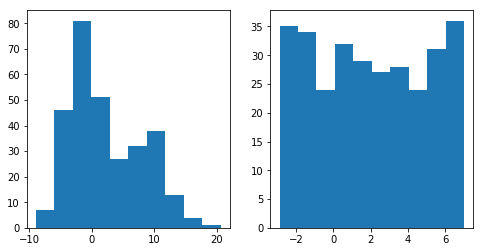

In [3]:
# some histograms to start understanding our data

plt.figure(figsize=(8,4))
plt.subplot(121)
plt.hist(q2_data.A)
plt.subplot(122)
plt.hist(q2_data.B)

(array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 299.]),
 array([-10000. ,  -8979.8,  -7959.6,  -6939.4,  -5919.2,  -4899. ,
         -3878.8,  -2858.6,  -1838.4,   -818.2,    202. ]),
 <a list of 10 Patch objects>)

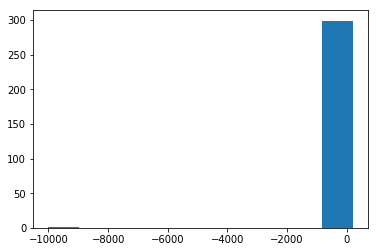

In [4]:
# and we can check our target too:
plt.hist(q2_data.C)

In [5]:
# let's get some descriptive stats, might be handy later
q2_data.describe()

,A,B,C
count,300.000000,300.000000,300.000000
mean,2.317009,2.013115,-41.564919
std,5.695248,2.998680,581.251021
min,-8.860000,-2.890000,-10000.000000
25%,-1.940000,-0.606250,-23.375000
50%,0.468500,1.935000,-3.090000
75%,7.042500,4.697500,16.300000
max,20.600000,7.000000,202.000000


It is clear that the target C has a couple of outliers, if you see the mean, the p50%. 
Maybe we can simplify the problem and get rid of these outliers - especially with a linear regression that as we know is a less adaptable algorithm!

In [6]:
# so we can delete some of these data points
q2_data_outl = q2_data[q2_data.C > -5000]
q2_data_outl.shape

(299, 3)

In [7]:
q2_data_outl.describe()

,A,B,C
count,299.000000,299.000000,299.000000
mean,2.290979,2.027339,-8.259116
std,5.686893,2.993552,71.321872
min,-8.860000,-2.890000,-315.000000
25%,-1.950000,-0.587000,-23.100000
50%,0.447000,1.940000,-2.940000
75%,7.025000,4.705000,16.300000
max,20.600000,7.000000,202.000000


## multicollinearity of the predictors?
### for the linear regression to hold, we need to make sure the collinearity (or multicollinearity when relevant) is kept to a minimum. Let's explore, visually, how are our 2 predictors behaving

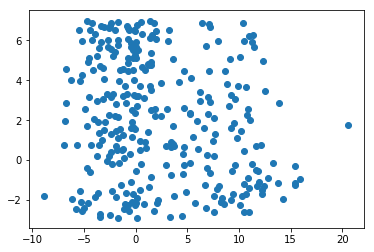

In [8]:
# no multicollinearity of independent variables?
# Apparently not - GOOD!
plt.scatter(q2_data.A, q2_data.B)

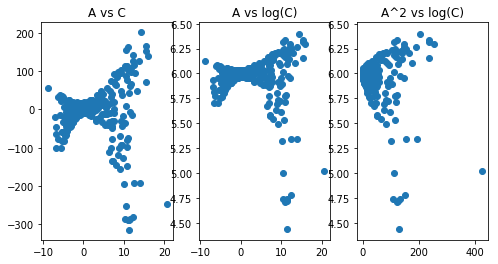

In [9]:
# Is there a linear(-ish!!!) relationship between predictors (A, B) and target (C)?

plt.figure(figsize=(8,4))
# variable A as is
plt.subplot(131)
plt.title('A vs C')
plt.scatter(q2_data_outl.A, q2_data_outl.C)

# dependent variable has a log-behaviour?
plt.subplot(132)
plt.title('A vs log(C)')
plt.scatter(q2_data_outl.A, np.log(q2_data_outl.C + 400))

# square terms?
plt.subplot(133)
plt.title('A^2 vs log(C)')
plt.scatter(np.square(q2_data_outl.A), np.log(q2_data_outl.C + 400))



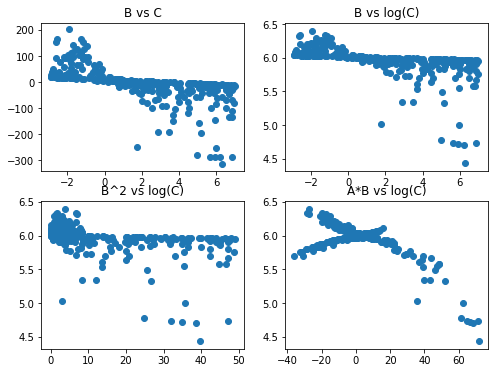

In [10]:
# Is there a linear(-ish!!!) relationship between predictors (A, B) and target (C)?

plt.figure(figsize=(8,6))
# variable B as is
plt.subplot(221)
plt.title('B vs C')
plt.scatter(q2_data_outl.B, q2_data_outl.C)

# dependent variable has a log-behaviour?
plt.subplot(222)
plt.title('B vs log(C)')
plt.scatter(q2_data_outl.B, np.log(q2_data_outl.C + 400))

# square terms?
plt.subplot(223)
plt.title('B^2 vs log(C)')
plt.scatter(np.square(q2_data_outl.B), np.log(q2_data_outl.C + 400))

# interactions?
plt.subplot(224)
plt.title('A*B vs log(C)')
plt.scatter(q2_data_outl.A*q2_data_outl.B, np.log(q2_data_outl.C + 400))

## In the face of the exploratory analysis...
### Issues
We know that our dataset will underperform with a linear regression. Indeed, some plot show as if there were two underlying processes recorded in one single variable. This becomes very obvious in the plot B vs log(C), for example.

### way forward
We will do the regression, more as a POC that will just highlight that the variance is poorly explained by the predictors.
However, there are linear trends that are obvious if we only consider, for exmaple, the positive values of A. This could lead to the construction of a model that will be performant ONLY for a subset of teh distribution that we desired to model. 
THis can still be useful and could help udnerstadn certain processes before expanding our tool to other markets/consumers/processes.


## Data preparation for the regression

In [11]:
# the dataset
# as per considerations above, we will use A, B, A^2 as predictors
# Our target will be sqrt(C) to make the relationship with the predictors as linear as possible.

# predictors
q2_data.head()

,A,B,C
0,0.490,-0.18,11.50
1,-1.410,-1.23,11.80
2,0.943,4.51,-3.24
3,3.570,5.07,-23.90
4,-1.700,6.91,-22.10


In [12]:
# let's add the missing predictor and separate target (dependent variable) from predictors (independent variables)
X = q2_data_outl.copy()
X.loc[:, 'A_square'] = X.A * X.A

# target
y = X.loc[:, 'C']
# WARNING we need to transform (translate then log) to avoid issues with negative values!!!
y = np.log(y + 400)
# we could evenutally normalise it too but let's give it a go as is

# predictors
X = X.drop('C', axis=1)
X.head()

,A,B,A_square
0,0.490,-0.18,0.240100
1,-1.410,-1.23,1.988100
2,0.943,4.51,0.889249
3,3.570,5.07,12.744900
4,-1.700,6.91,2.890000


In [13]:
y.shape

(299,)

In [14]:
y.describe()

count    299.000000
mean       5.946807
std        0.245337
min        4.442651
25%        5.931980
50%        5.984087
75%        6.031406
max        6.400257
Name: C, dtype: float64

(array([  1.,   5.,   2.,   0.,   3.,   6.,  18., 157.,  89.,  18.]),
 array([4.44265126, 4.63841188, 4.83417249, 5.02993311, 5.22569373,
        5.42145435, 5.61721497, 5.81297559, 6.00873621, 6.20449683,
        6.40025745]),
 <a list of 10 Patch objects>)

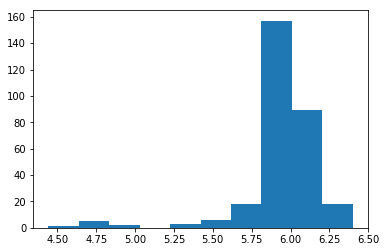

In [15]:
plt.hist(y)

In [16]:
q2_data.C

0       11.50
1       11.80
2       -3.24
3      -23.90
4      -22.10
        ...  
295     33.20
296    108.00
297   -126.00
298   -315.00
299    -97.70
Name: C, Length: 300, dtype: float64

## train the model

In [17]:
model_lr = linear_regression_estimator()

In [18]:
model_lr.fit(X, y)

(299, 1)
(299, 4)
[ 1.      0.49   -0.18    0.2401]


In [19]:
model_lr.betas

array([ 6.09671028e+00,  1.07518172e-03, -4.78793709e-02, -1.47536965e-03])

In [20]:
# let's test our made-from-scratch linear regression transformer... yay it works!!!
model_lr.predict(X.iloc[0].values)

6.096710279638661 [ 0.00107518 -0.04787937 -0.00147537]


6.10550116918944

## predicted values

In [25]:
# let's calculate all the y' FROM THE MODEL

y_pred = []
for i in range(X.shape[0]):
    _y = model_lr.predict(X.iloc[i].values)
    y_pred.append(_y)



6.096710279638661 [ 0.00107518 -0.04787937 -0.00147537]
6.096710279638661 [ 0.00107518 -0.04787937 -0.00147537]
6.096710279638661 [ 0.00107518 -0.04787937 -0.00147537]
6.096710279638661 [ 0.00107518 -0.04787937 -0.00147537]
6.096710279638661 [ 0.00107518 -0.04787937 -0.00147537]
6.096710279638661 [ 0.00107518 -0.04787937 -0.00147537]
6.096710279638661 [ 0.00107518 -0.04787937 -0.00147537]
6.096710279638661 [ 0.00107518 -0.04787937 -0.00147537]
6.096710279638661 [ 0.00107518 -0.04787937 -0.00147537]
6.096710279638661 [ 0.00107518 -0.04787937 -0.00147537]
6.096710279638661 [ 0.00107518 -0.04787937 -0.00147537]
6.096710279638661 [ 0.00107518 -0.04787937 -0.00147537]
6.096710279638661 [ 0.00107518 -0.04787937 -0.00147537]
6.096710279638661 [ 0.00107518 -0.04787937 -0.00147537]
6.096710279638661 [ 0.00107518 -0.04787937 -0.00147537]
6.096710279638661 [ 0.00107518 -0.04787937 -0.00147537]
6.096710279638661 [ 0.00107518 -0.04787937 -0.00147537]
6.096710279638661 [ 0.00107518 -0.04787937 -0.00

### let's plot the target (y) and the ESTIMATED target (y_pred)
- NO SURPRISES, as expected, the variance of the predicted target is very large - but comparable to the original target y data. 
- The multiple trends observed in each variable might be responsible for this.
- Only in some specific ranges, the linear model could be valid - e.g. positive values of A, B.

(array([  1.,   5.,   2.,   0.,   3.,   6.,  18., 157.,  89.,  18.]),
 array([4.44265126, 4.63841188, 4.83417249, 5.02993311, 5.22569373,
        5.42145435, 5.61721497, 5.81297559, 6.00873621, 6.20449683,
        6.40025745]),
 <a list of 10 Patch objects>)

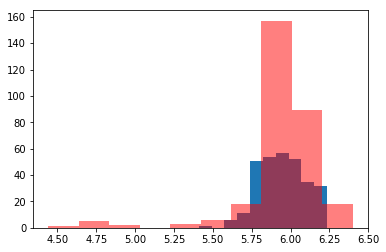

In [26]:
plt.hist(y_pred)
plt.hist(y, color='r', alpha=0.5)

### plot error histogram
What about the residuals? <br>
Are they normal? (In here a K-Smirnov test would be useful! Not applied here for question of time)


(array([  1.,   5.,   0.,   1.,   4.,  16., 122., 119.,  25.,   6.]),
 array([-1.17341581, -1.00480928, -0.83620275, -0.66759621, -0.49898968,
        -0.33038315, -0.16177661,  0.00682992,  0.17543645,  0.34404299,
         0.51264952]),
 <a list of 10 Patch objects>)

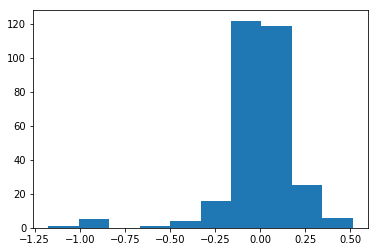

In [27]:
plt.hist(y-y_pred)

It looks only slightly skewed and looks normal, but we should test for normality to be sure (K-Smirnov test or Q-Q plots). <br>Considering the range and the known values of the transformed target "y", it is clear that our model has a moderately large variance! AND it slightly off the centre 0, showing perhaps some bias.


### coefficients and p-values
After seeing the histograms of predictions and of errors, 

In [30]:
import statsmodels.api as sm
from scipy import stats

def add_intercept(X):
    dummies_shape = X.shape[0]
    dummies = np.ones(shape=dummies_shape).reshape(-1,1)
    return np.concatenate((dummies, X), 1)

X = add_intercept(X)
model_stats = sm.OLS(y, X)
mdl = model_stats.fit()
#print(mdl.summary2())

In [31]:
mdl.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      C   R-squared:                       0.366
Model:                            OLS   Adj. R-squared:                  0.360
Method:                 Least Squares   F-statistic:                     56.87
Date:                Wed, 13 May 2020   Prob (F-statistic):           4.88e-29
Time:                        17:58:37   Log-Likelihood:                 64.596
No. Observations:                 299   AIC:                            -121.2
Df Residuals:                     295   BIC:                            -106.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.0967      0.017    363.483      0.000       6.064       6.130
x1             0.0011      0.003      0.323      0.747      -0.005       0.008
x2            -0.0479      0.004    -12.330      0.000      -0.056      -0.040
x3            -0.0015      0.000     -4.331      0.000      -0.002      -0.001
==============================================================================
Omnibus:                      172.909   Durbin-Watson:                   1.721
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1650.505
Skew:                          -2.198   Prob(JB):                         0.00
Kurtosis:                      13.637   Cond. No.                         100.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Indeed, we confirm that our model is underperforming: 
- A is not significantly correlated to y
- Adj R2 is low (0.36) so the explained variance is limited.


### plot error per sample (homoscedasticity?)

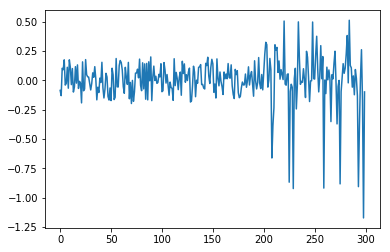

In [33]:
plt.plot(y-y_pred)

Interesting! Despite being a rather poor model, it is relatively consistent except for the last 100 samples. 
- Are these samples coming from a different distribution?
- Are these samples recorded differently (by mistake of the tool measuring???)
<br><br>
In any case, the assumption of homoscedasticity is violated. <br>This is shouting: "Your model is too simplistic and does not capture all the underlying variations in the data!!!"

### Conclusions / key observations
- IMPORTANT: the goal is not clear. Do we want the best predictive performance? Or is it more about learning from the model? Do we know if the predictors have a causal relationship withteh target or are we happy with a purely correlational interpretation?  
- It is obvious that the variable A and B are capturing behaviours that seem to belong to more than 2 different processes (recoding errors?)
- The linear relationship FOR A LIMITED RANGE is observed if we transform the target (in this case: translation and log).
- The comparison of the distributions of y and y_predicted shows that the model is underperforming.
- The distribution of the differences (y - y_prediction) supports the above and seems to point towards the violation of the linear regression assumption of *normality of residual*.
- Homoscedasticity is violated too. 

## Mitigation and  next steps:
- We should either try to (1) disentangle the various processes captured within each variable or (2) apply an algorithm that is more adaptable. 
- Option (1) could consist on a prelimianry step of CLUSTERING (knn's?) that could help us disentangle trends in an unsupervised manner. The new disentangled predictors could then be used for the regression.
- Option (2) could potentially result in less interpretability, but it depends of the ultimate goal of the project. Purely predictive ==> then we can do with a blackbox.<br>
<br>
With more time we would:
- Add a clustering step with the aim of disentangling trend in our variables A and B.
- Assess the need of regularisation to avoid any overfitting and improve stability.
- Analyse some more metrics BIC, AIC and perform more test (K-Smirnov for normality of residual, for example)
- Try alternative, more adaptable methods (SVM's, NN's, etc) -- potentially less interpretable.
- Assess the possibility of using probabiliistic methods.
- Assess the possibility of converting the problem into a classification algorithm by categorising the target?
- Crossvalidation: Especially if we want to use this regression as a  predictive tool, we would like to split X in train and test datasets and perform crossvalidation to ensure we are not overfitting - i.e. that our model generalises well for data points outside of our dataset.

<br>Altogether a nice challenging exercise that makes us go down to the basics. You will appreciate that some ends in this flow remain open, mainly due to time availability, but hopefully it gives you the idea of how I would tackle to full problem and hte implications that I would consider. 